# Домашняя работа №2

### 1) Создание и загрузка данных в таблицу

In [ ]:
create table customer (
	customer_id int4 primary key,
	first_name varchar(50),
	last_name varchar(50),
	gender varchar(30),
	dob varchar(50),
	job_title varchar(50),
	job_industry_category varchar(50),
	wealth_segment varchar(50),
	deceased_indicator varchar(50),
	owns_car varchar(30),
	address varchar(50),
	postcode varchar(30),
	state varchar(30),
	country varchar(30),
	property_valuation int4
);

create table transaction (
	transaction_id int4,
	product_id int4,
	customer_id int4,
	transaction_date varchar(30),
	online_order varchar(30),
	order_status varchar(30),
	brand varchar(30),
	product_line varchar(30),
	product_class varchar(30),
	product_size varchar(30),
	list_price float4,
	standard_cost float4
);

Таблица customer:

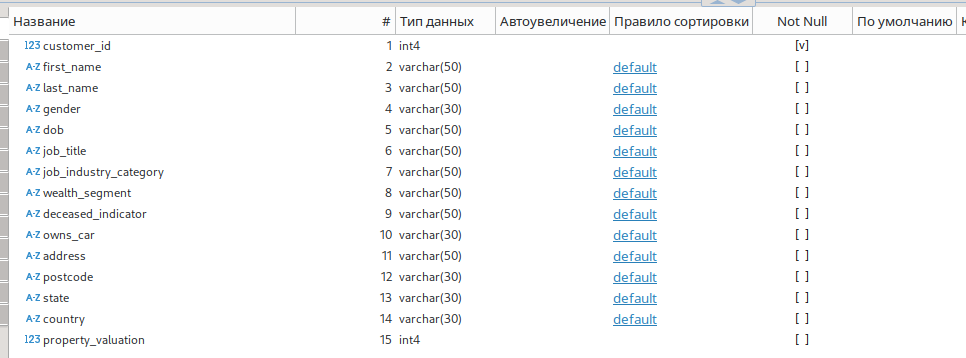

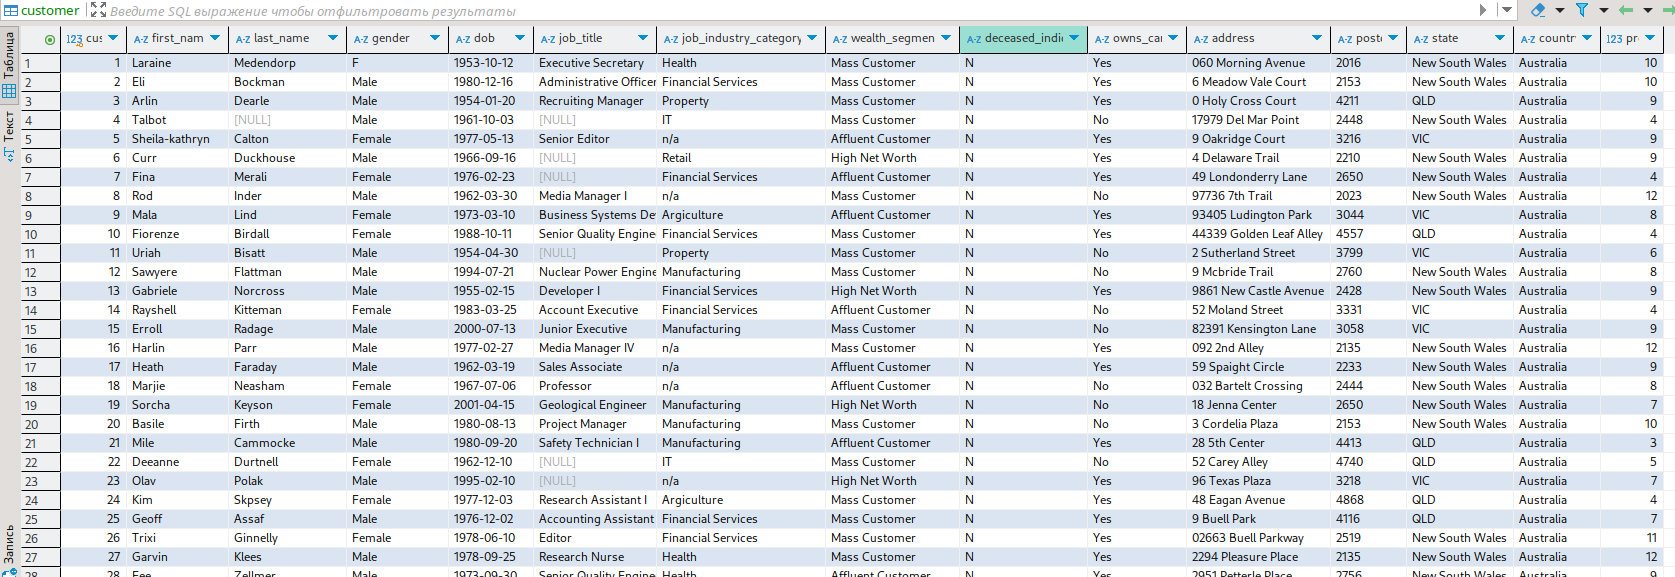

Таблица transaction:

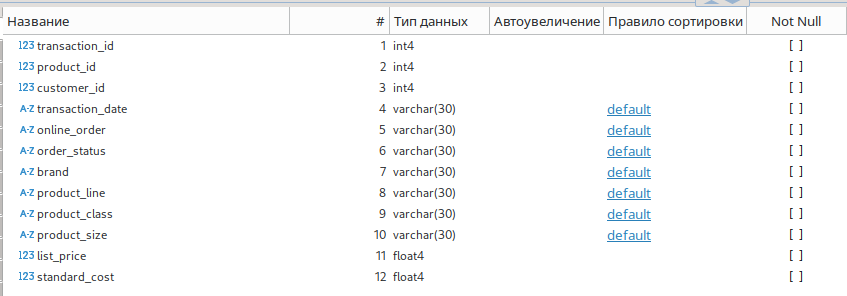

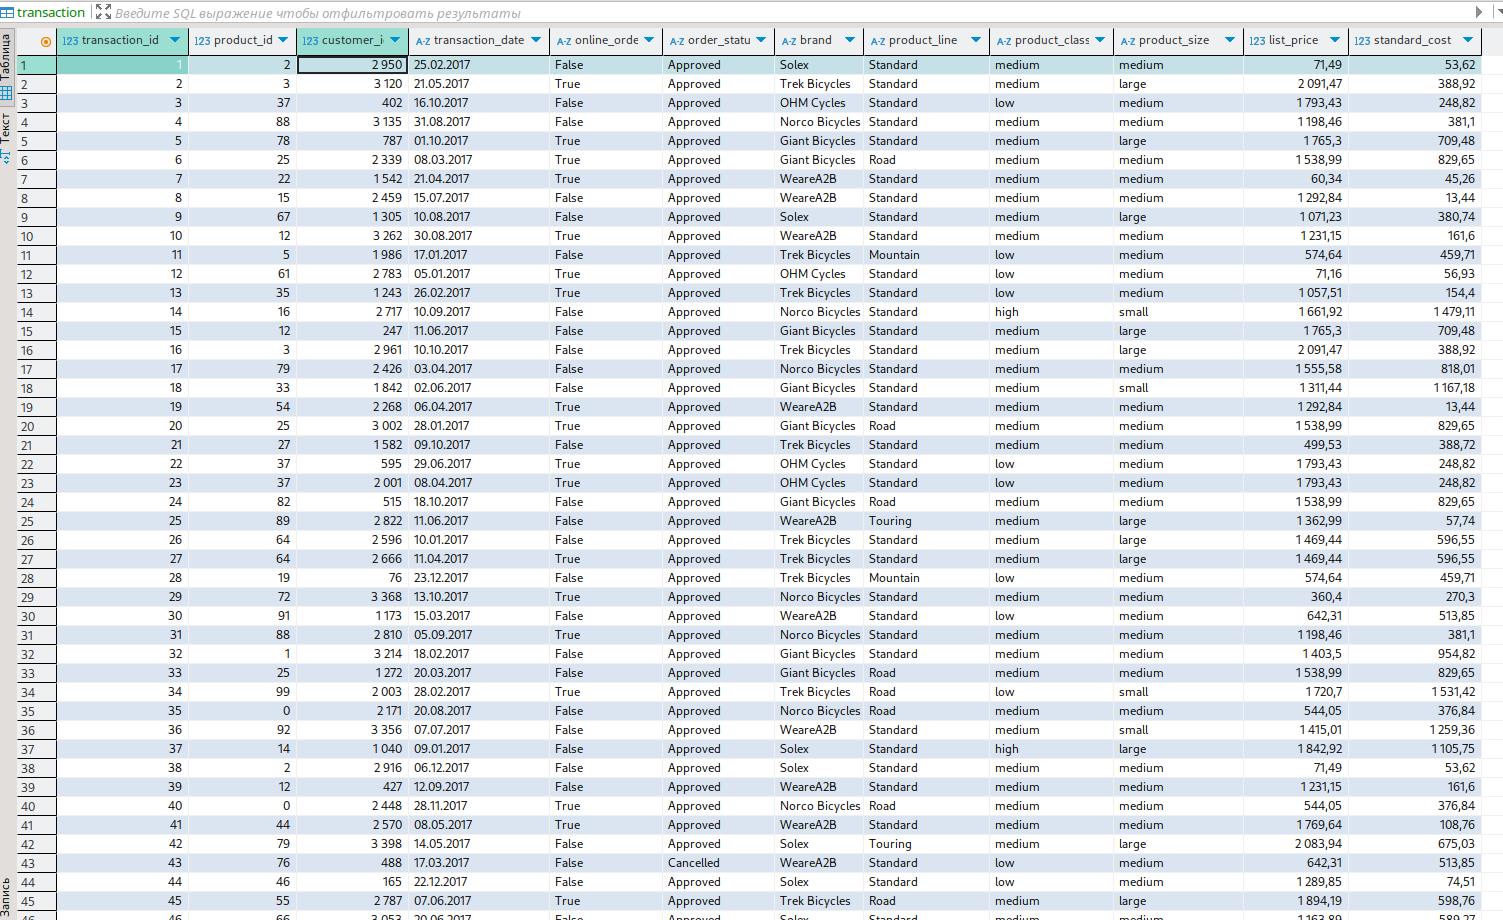

### 2) Запросы

2.1 Вывести все уникальные бренды, у которых стандартная стоимость выше 1500 долларов.

In [ ]:
select distinct brand from transaction where standard_cost > 1500;

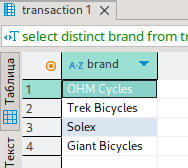

2.2 Вывести все подтвержденные транзакции за период '2017-04-01' по '2017-04-09' включительно.

In [ ]:
select * from transaction
where order_status = 'Approved' and to_date(transaction_date, 'DD.MM.YYYY') between '2017-04-01' and '2017-04-09';

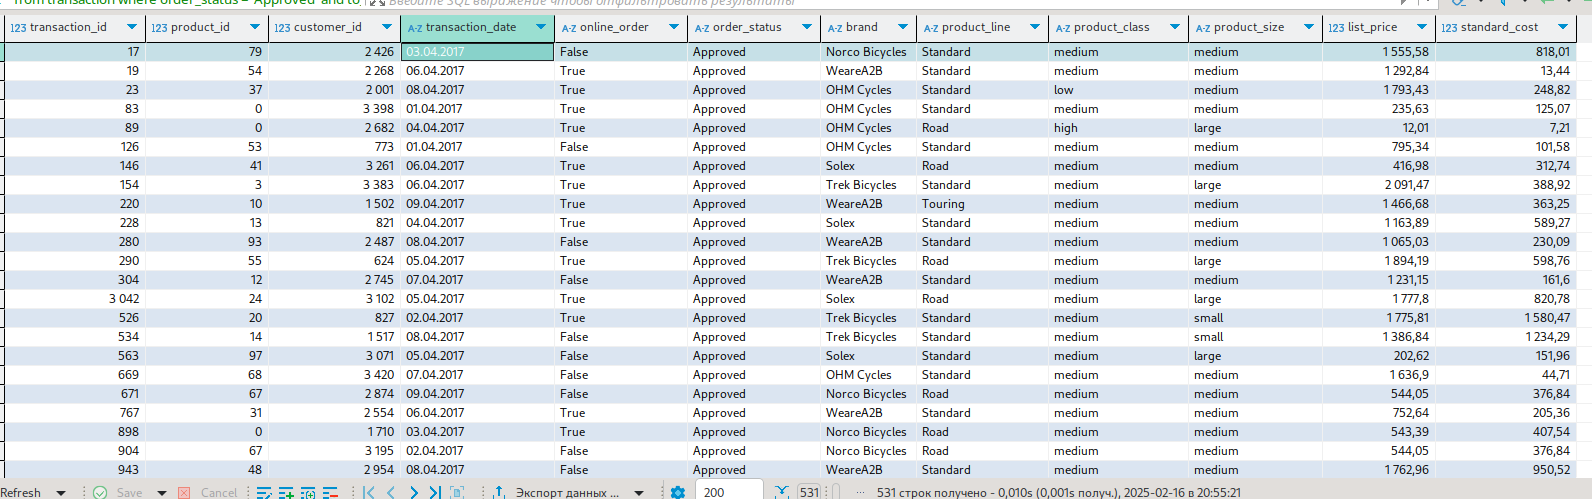

2.3 Вывести все профессии у клиентов из сферы IT или Financial Services, которые начинаются с фразы 'Senior'.

In [ ]:
select distinct(job_title) from customer
where job_industry_category in ('IT', 'Financial Services') and starts_with(job_title, 'Senior');

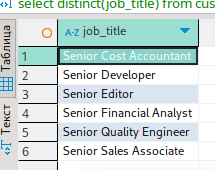

2.4 Вывести все бренды, которые закупают клиенты, работающие в сфере Financial Services

In [ ]:
select distinct(t.brand) from customer c
inner join "transaction" t on t.customer_id = c.customer_id
where t.brand is not null and c.job_industry_category = 'Financial Services'

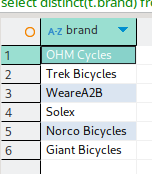

2.5 Вывести 10 клиентов, которые оформили онлайн-заказ продукции из брендов 'Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles'.

In [ ]:
select c.* from customer c -- выводим именно клиентов
inner join transaction t on t.customer_id = c.customer_id
where t.online_order = 'True' and t.brand in ('Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles')
limit 10;

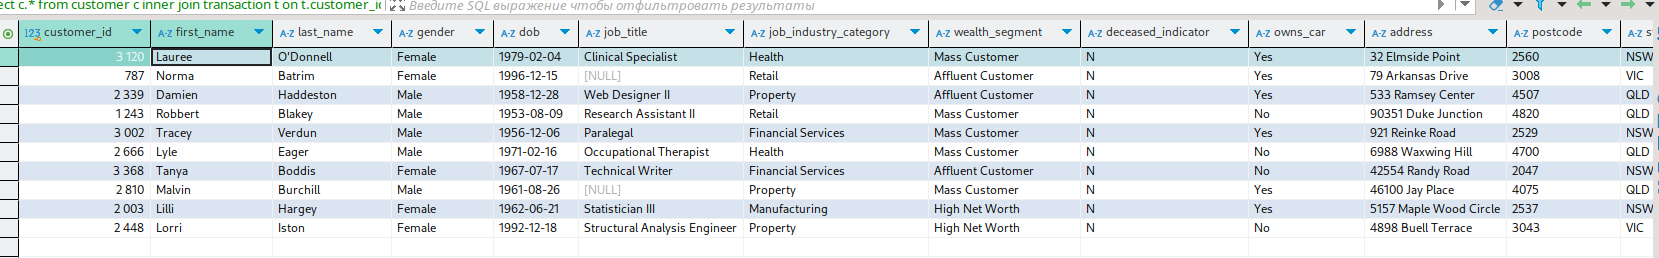

2.6 Вывести всех клиентов, у которых нет транзакций

In [ ]:
select c.* from customer c
left outer join transaction t on t.customer_id = c.customer_id
where t.customer_id is null;

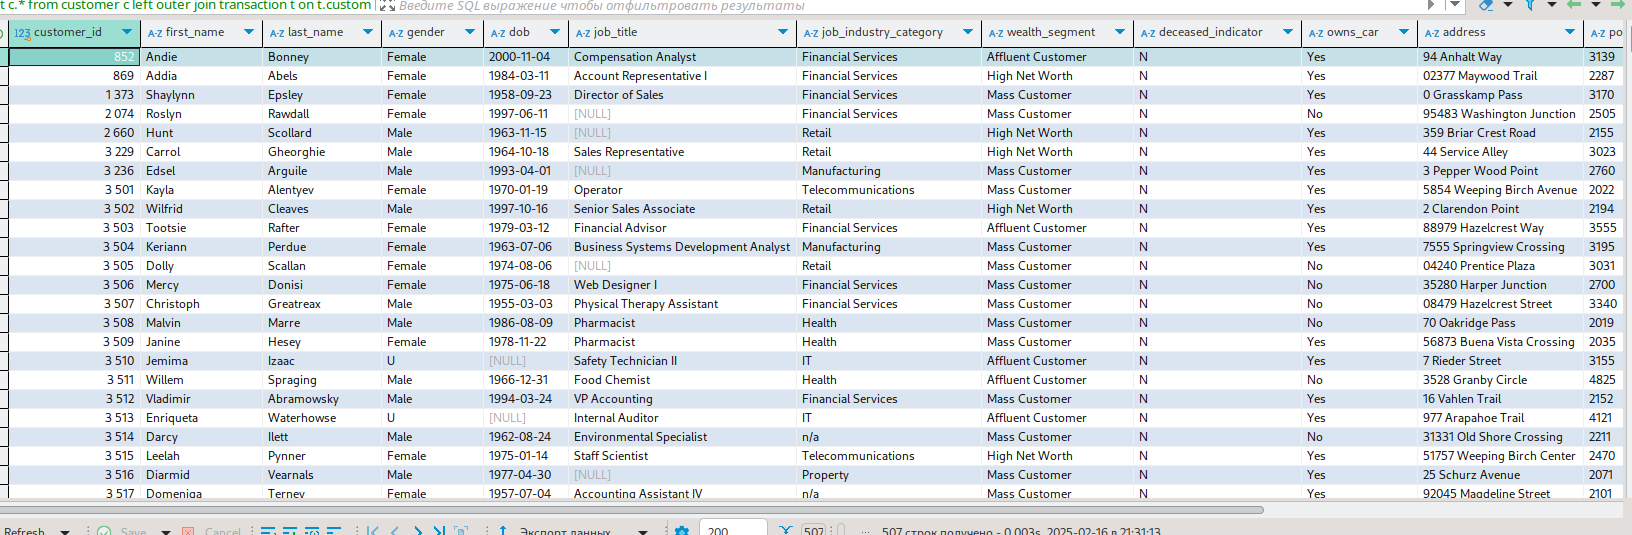

2.7 Вывести всех клиентов из IT, у которых транзакции с максимальной стандартной стоимостью.

In [ ]:
select c.* from customer c
inner join transaction t on t.customer_id = c.customer_id
where c.job_industry_category = 'IT' and t.standard_cost = (select max(standard_cost) from transaction);

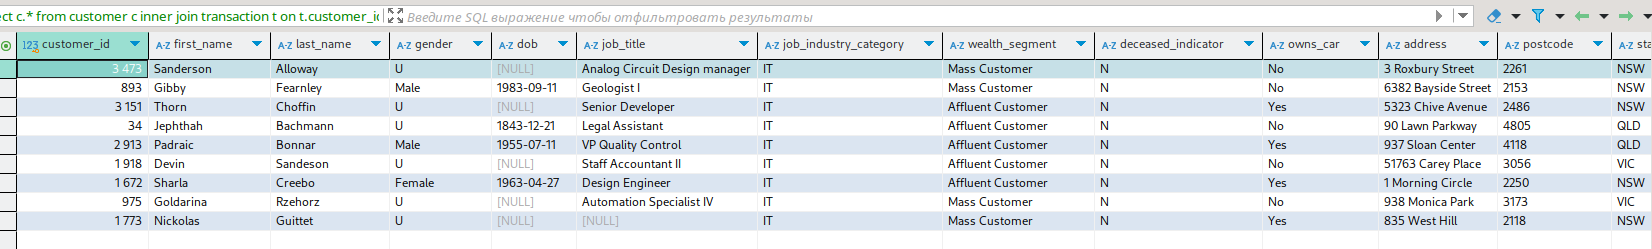

2.8 Вывести всех клиентов из сферы IT и Health, у которых есть подтвержденные транзакции за период '2017-07-07' по '2017-07-17'.

In [ ]:
select c.* from customer c
inner join transaction t on t.customer_id = c.customer_id
where c.job_industry_category in ('IT', 'Health') and
      t.order_status = 'Approved' and
      to_date(transaction_date, 'DD.MM.YYYY') between '2017-07-07' and '2017-07-17';

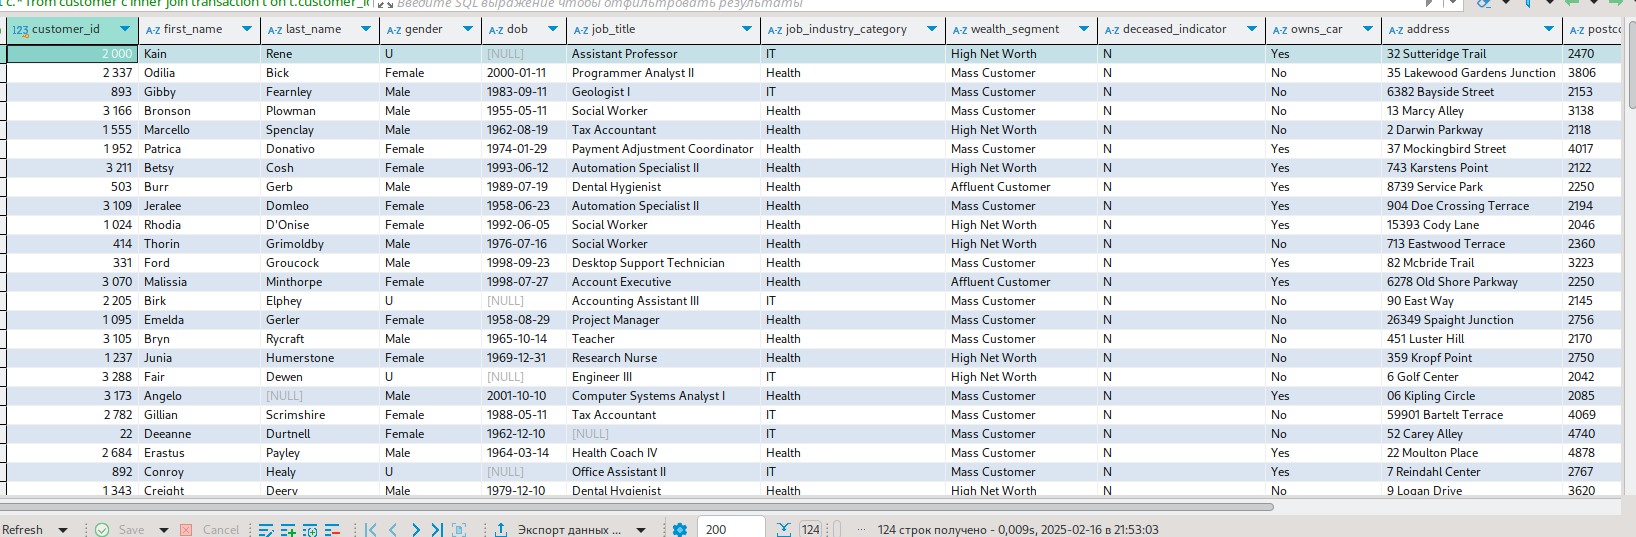